<a href="https://colab.research.google.com/github/mahathi-pr/Stamatics-project/blob/main/dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    from efficientnet_pytorch import EfficientNet
except ImportError:
    !pip install -q efficientnet_pytorch
    from efficientnet_pytorch import EfficientNet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.4 MB/s eta 0:00:00


In [4]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gollamahathi","key":"e618f62a3f50bc51fd7fa88e0b35bda8"}'}

In [5]:
!mkdir -p /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json


In [6]:
!kaggle competitions download -c dog-breed-identification


 97% 673M/691M [00:05<00:00, 73.6MB/s]
100% 691M/691M [00:05<00:00, 138MB/s] 


In [7]:
!unzip -q dog-breed-identification.zip


In [8]:
!ls -lh


total 717M
-rw-r--r-- 1 root root 691M Dec 11  2019 dog-breed-identification.zip
-rw-r--r-- 1 root root 471K Dec 11  2019 labels.csv
drwxr-xr-x 1 root root 4.0K Jul  1 21:04 sample_data
-rw-r--r-- 1 root root  25M Dec 11  2019 sample_submission.csv
drwxr-xr-x 2 root root 640K Jul  5 21:14 test
drwxr-xr-x 2 root root 648K Jul  5 21:14 train


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth
100%|██████████| 47.1M/47.1M [00:00<00:00, 139MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Loaded pretrained weights for efficientnet-b3
Epoch 1 | Loss: 3.5408 | Val Acc: 76.93% | F1: 75.24%
✅ Best model saved
Epoch 2 | Loss: 1.7780 | Val Acc: 82.60% | F1: 82.09%
✅ Best model saved
Epoch 3 | Loss: 1.4224 | Val Acc: 84.75% | F1: 84.51%
✅ Best model saved
Epoch 4 | Loss: 1.2795 | Val Acc: 85.83% | F1: 85.65%
✅ Best model saved
Epoch 5 | Loss: 1.1843 | Val Acc: 86.12% | F1: 85.78%
✅ Best model saved
Epoch 6 | Loss: 1.1161 | Val Acc: 85.53% | F1: 85.33%
Epoch 7 | Loss: 1.0736 | Val Acc: 85.14% | F1: 84.75%
Epoch 8 | Loss: 1.0345 | Val Acc: 85.73% | F1: 85.37%
Epoch 9 | Loss: 0.9954 | Val Acc: 85.92% | F1: 85.74%
Epoch 10 | Loss: 0.9791 | Val Acc: 86.51% | F1: 86.23%
✅ Best model saved
Epoch 11 | Loss: 0.9635 | Val Acc: 85.14% | F1: 84.90%
Epoch 12 | Loss: 0.9566 | Val Acc: 86.41% | F1: 86.21%
Epoch 13 | Loss: 0.9485 | Val Acc: 86.12% | F1: 85.92%
Epoch 14 | Loss: 0.9359 | Val Acc: 86.41% | F1: 86.25%
Epoch 15 | Loss: 0.9296 | Val Acc: 86.71% | F1: 86.44%
✅ Best model saved
Epoch

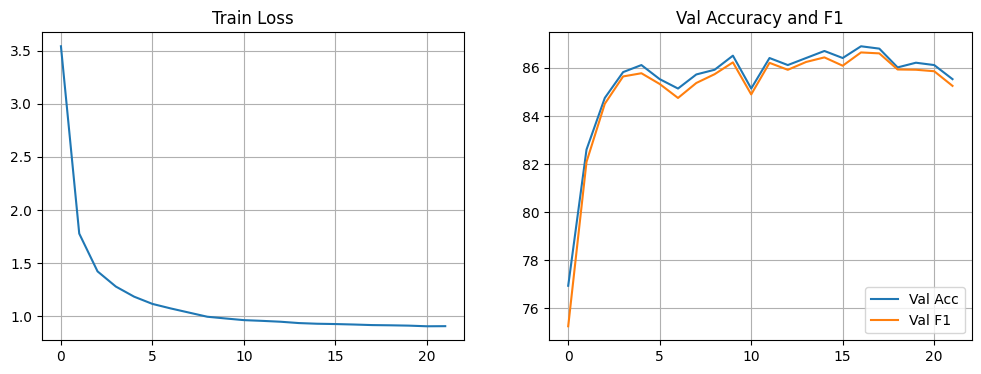

📄 submission.csv ready for upload


In [8]:

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from efficientnet_pytorch import EfficientNet

#  Load labels and encode
labels_df = pd.read_csv('/content/labels.csv')
label_encoder = LabelEncoder()
labels_df['label'] = label_encoder.fit_transform(labels_df['breed'])
breed_names = label_encoder.classes_
num_classes = len(breed_names)

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels_df['label']), y=labels_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Train/Val split
train_df, val_df = train_test_split(labels_df, test_size=0.1, stratify=labels_df['label'], random_state=42)
class DogBreedDataset(Dataset):
    def __init__(self, df, img_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['id']
        img_path = os.path.join(self.img_dir, img_id + '.jpg')
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        if self.is_test:
            return image, img_id
        else:
            label = self.df.iloc[idx]['label']
            return image, label

#  Strong Augmentation
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(300, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

#  DataLoaders
train_dataset = DogBreedDataset(train_df, '/content/train', transform)
val_dataset = DogBreedDataset(val_df, '/content/train', transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# EfficientNet-B3
model = EfficientNet.from_pretrained('efficientnet-b3')
model._fc = nn.Linear(model._fc.in_features, num_classes)
model = model.to(device)

# Loss + Label Smoothing
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=2, factor=0.5, verbose=True)

# Training with early stopping and best model saving
best_acc = 0
patience = 5
wait = 0
train_losses, val_accuracies, val_f1s = [], [], []

for epoch in range(30):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Validation
    model.eval()
    val_preds, val_targets = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

    val_acc = accuracy_score(val_targets, val_preds) * 100
    val_f1 = f1_score(val_targets, val_preds, average='weighted') * 100
    val_accuracies.append(val_acc)
    val_f1s.append(val_f1)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1} | Loss: {avg_loss:.4f} | Val Acc: {val_acc:.2f}% | F1: {val_f1:.2f}%")

    # Early stopping + Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        wait = 0
        torch.save(model.state_dict(), '/content/best_effnet_b3.pth')
        print("✅ Best model saved")
    else:
        wait += 1
        if wait >= patience:
            print("⏹️ Early stopping triggered")
            break

#  Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.title("Train Loss"); plt.grid()
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Val Acc")
plt.plot(val_f1s, label="Val F1")
plt.title("Val Accuracy and F1"); plt.legend(); plt.grid()
plt.show()

# Load best model and predict test
model.load_state_dict(torch.load('/content/best_effnet_b3.pth'))
model.eval()

test_ids = [f.split('.')[0] for f in os.listdir('/content/test') if f.endswith('.jpg')]
test_df = pd.DataFrame({'id': test_ids})
test_dataset = DogBreedDataset(test_df, '/content/test', transform, is_test=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

all_probs, all_ids = [], []
with torch.no_grad():
    for images, ids in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        all_probs.extend(probs.cpu().numpy())
        all_ids.extend(ids)

submission_df = pd.DataFrame(all_probs, columns=breed_names)
submission_df.insert(0, 'id', all_ids)
submission_df.to_csv('/content/submission.csv', index=False)
print("📄 submission.csv ready for upload")


In [9]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>